#Heart Disease Prediction by Yuvraj Singh Sran

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We Have Imported the basic libraries needed before training any models

In [96]:
df = pd.read_csv('/content/heart.csv')
#Using Pandas librarie we have Imported the dataset into our code.
#Here "df" represents the dataset

# 1. Pre-Processing

#### Shape of the data

In [97]:
df.shape

(303, 14)

#### Printing few columns of the dataset

In [98]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Let's Check wether there are any missing values or not!!

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### That's Great there are no missing values for this dataset.

### Now, Let's Analyse the 'Target' Variable

In [100]:
df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [101]:
df['target'].unique()

array([1, 0])

#### This clearly shows that this is the classificiation Problem as it has only two values 0 or 1. Which also represents that the pateint will have a heart disease or not (0 -> Patient is healthy , 1-> Patient is not healthy)

### Checking correlation between colums

In [102]:
print(df.corr()["target"].abs().sort_values(ascending=False))
#We can see that the column 'fbs' is weakly correlated. So, whether we include this feature or not it does not makes any huge difference.

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


# 2. Exploratory Data Analysis(EDA)

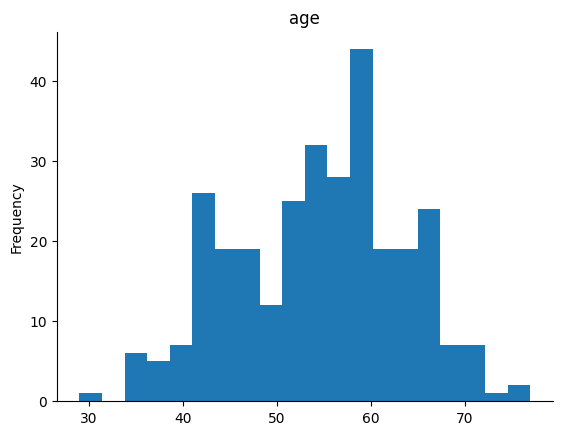

In [103]:
# @title Age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='cp', ylabel='count'>

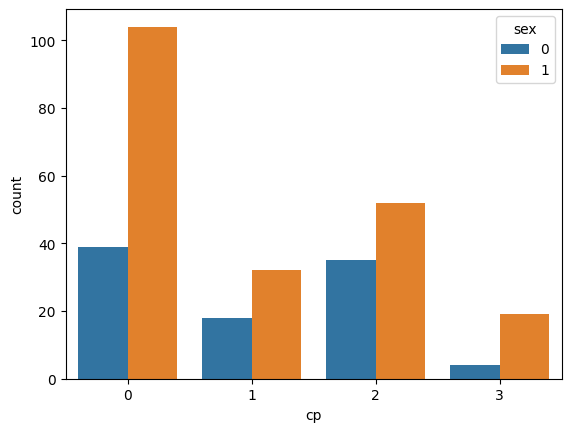

In [104]:
# @title Chest Pain Type by Gender

sns.countplot(x = "cp", hue = "sex", data = df)

<Axes: xlabel='age', ylabel='chol'>

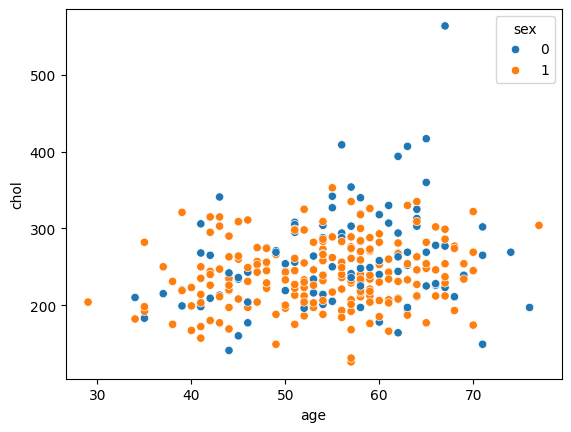

In [105]:
# @title Age vs Cholesterol

sns.scatterplot(x = "age", y = "chol", data = df, hue = "sex")

<Axes: xlabel='cp', ylabel='target'>

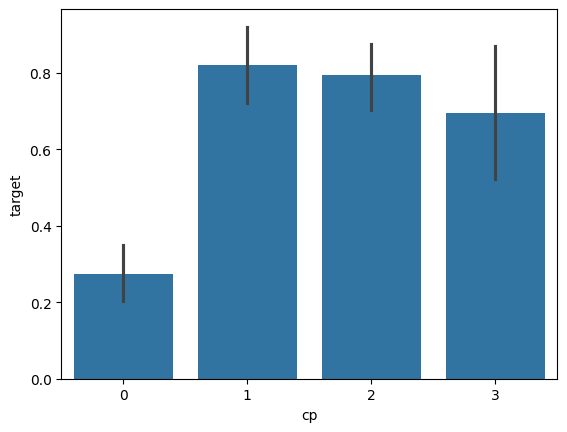

In [106]:
# @title Chest Pain vs Heart Disease

sns.barplot(x = "cp", y = "target", data=df)

### We have checked that there is not any NULL values and any of the column do not require any encoding as all the values lies within the range and there are'nt any values with a much higher value than other(For eg: 1350000 and 1)

# So, Lets Train the Model!!

# 3. Splitting The dataset into Train and Test sets.

In [107]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [108]:
X_train.shape

(242, 13)

In [109]:
X_test.shape

(61, 13)

In [110]:
Y_train.shape

(242,)

In [111]:
Y_test.shape

(61,)

# 4. Model Fitting

## Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_LR = lr.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
print(Y_pred_LR)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [114]:
from sklearn.metrics import accuracy_score

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: {:.2f} %".format(score_lr))


The accuracy score achieved using Logistic Regression is: 85.25 %


## Naive Bayes

In [115]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_NB = nb.predict(X_test)

In [116]:
print(Y_pred_NB)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [117]:
from sklearn.metrics import accuracy_score

score_nb = round(accuracy_score(Y_pred_NB,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: {:.2f} %".format(score_nb))

The accuracy score achieved using Naive Bayes is: 85.25 %


## SVM (Support Vector Machine)

In [118]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [119]:
print(Y_pred_svm)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [120]:
from sklearn.metrics import accuracy_score

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using SVM is: {:.2f} %".format(score_svm))

The accuracy score achieved using SVM is: 81.97 %


## KNN (K Nearest Neighbors)

In [121]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [122]:
Y_pred_knn

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [123]:
from sklearn.metrics import accuracy_score

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: {:.2f} %".format(score_knn))

The accuracy score achieved using KNN is: 67.21 %


## Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_x = None

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt, Y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# print("The maximum accuracy achieved using Decision Tree is: {:.2f} %".format(max_accuracy))
# print("It was achieved with random_state parameter value:", best_x)

from sklearn.metrics import accuracy_score

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.69 %


## Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)


In [126]:
from sklearn.metrics import accuracy_score

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 90.16 %


## XG Boost

In [127]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [128]:
Y_pred_xgb

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [129]:
from sklearn.metrics import accuracy_score

score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XG-BOOST is: {:.2f} %".format(score_lr))

The accuracy score achieved using XG-BOOST is: 85.25 %


# 5. Final Scores

In [130]:
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost"]

for algorithm, score in zip(algorithms, scores):
    print(f"The accuracy score achieved using {algorithm} is: {score:.2f} %")


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 78.69 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %


<ipython-input-136-61467737ac1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=scores, palette=colors)


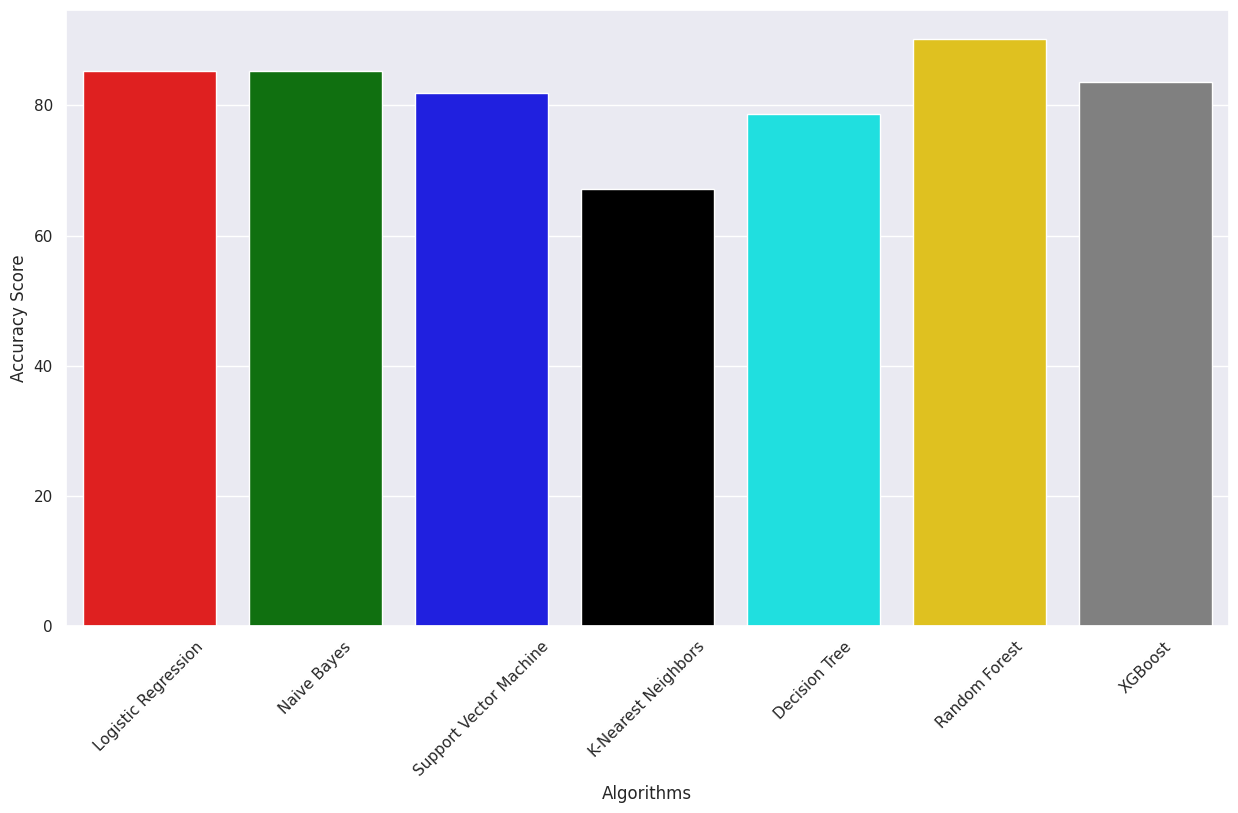

In [136]:
# Custom colors for each algorithm
colors = ["red", "green", "blue", "black", "cyan", "gold", "grey"]

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(x=algorithms, y=scores, palette=colors)
plt.xticks(rotation=45)
plt.show()